<a href="https://colab.research.google.com/github/desewenkdk/Python/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import modules

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


# Initial values of Models

In [0]:
epochs = 10
learning_rate = 0.01
batch_size = 128
num_classes = 10

# plot IMage

In [0]:
def plot_images(x,y_true, y_pred=None, size=(5,5)):
    assert len(x) == len(y_true) == size[0] * size[1]
    
    fig,axes = plt.subplots(size[0], size[1])
    fig.subplots_adjust(hspace=0.5, wspace=0.1)
    
    
    //image showing?
    for i, ax in enumerate(axes.flat):
        if x[i].shape[-1] == 1:
            ax.imshow(x[i].reshape(x[i].shape[0], x[i].shape[1]))
        else:
            ax.imshow(x[i])
            
        if y_pred is None:
            xlabel = "True: {0}".format(y_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(y_true[i].argmax(), y_pred[i].argmax())
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
                

# Loading and reshaping the data

## Load DataSet

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


11493376/11490434 [==============================] - 2s 0us/step


# Reshaping Data

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Object `showing` not found.


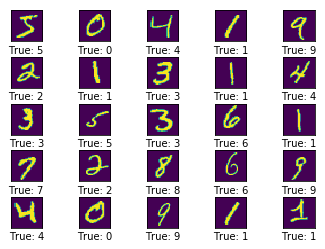

In [6]:
if len(x_train.shape) < 4:
    x_train= x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1],x_train.shape[2],1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

plot_images(x_train[:25], y_train[:25])

# Creating Model

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax')) ##output layer

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Visualize Model
must import SVG model

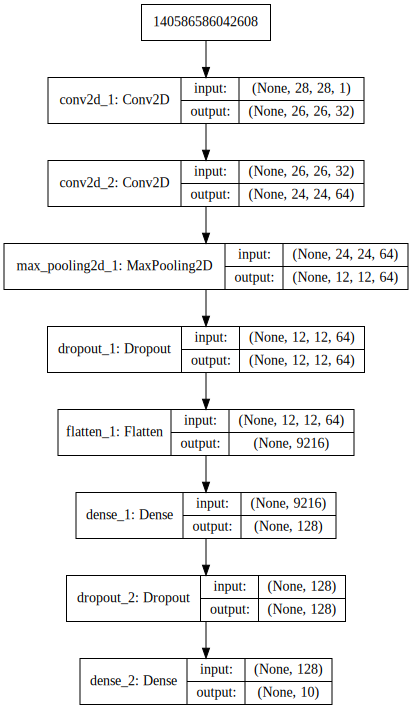

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

# Compling and Training Model!

optimizer
* SGD..보단 ADAM추천.

line2 
* using **CrossEntropy function** for Loss function

학습이 진행될 수 록 loss값이 줄어든다


In [9]:
optimizer = keras.optimizers.Adam(lr = learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = optimizer, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3071 - acc: 0.9080 - val_loss: 0.0694 - val_acc: 0.9779
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1491 - acc: 0.9557 - val_loss: 0.0624 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1310 - acc: 0.9615 - val_loss: 0.0545 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1211 - acc: 0.9651 - val_loss: 0.0535 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1184 - acc: 0.9648 - val_loss: 0.0455 - val_acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1106 - acc: 0.9669 - val_loss: 0.0513 - val_acc: 0.9844
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss:

# Evaluating and Prediction the Model


In [10]:
score = model.evaluate(x_test, y_test, verbose=0) #tuple을 리턴한다.
print('Test loss:',score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(x_test)

Test loss: 0.049061078057018585
Test accuracy: 0.986


# Show Result of Evaluation

Object `showing` not found.


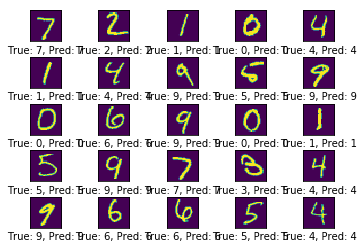

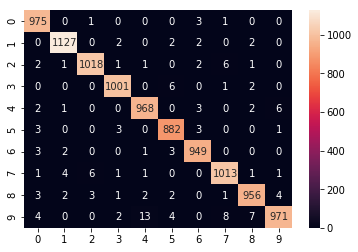

In [16]:
plot_images(x=x_test[:25], y_true=y_test[:25], y_pred = y_pred[:25])
y_result = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
sns.heatmap(pd.DataFrame(y_result, range(10), range(10)), annot=True, fmt='g')